# Model Viewer

## Analysis of the Various Models

### Singular or Multiple, All Are Available!

This notebook takes in .npy Observation Viewing Geometry models, either constructed from simulation data or real data. Everything is in the form of incidence, emission, azimuth angles, and the data stored is in I/F.

In [48]:
#CELL 1: READ IN DATA.

#This is an array that holds the filenames of all models to be loaded. If you make a new model, add it to the list.
#To NOT plot a model, just comment it out. Easy!
modelNames = [
    ["Huygens2.00um.npy","Huygens Landing Site"],
    ["SpecularModel2.00um.npy","Old Specular Model"],
    ["LambertianModel2.00um.npy","Old Lambertian Model"],
    ["North2.00umLake.npy","Old North Polar Lakes"],
    ["North2.00umLand.npy","Old North Polar Land"],
    ["Equator2.00umDunes.npy","Equatorial Dunes"],
    ["Equator2.00umPlains.npy","Equatorial Plains"],
    ["Equator2.00umHummocky.npy","Equatorial Hummocks"],
    ["Equator2.00umXanadu.npy","Xanadu"],
    ["lambSimA0.1.npy","Lambertian Model 2um A0.1"],
    ["lambSimA0.2.npy","Lambertian Model 2um A0.2"],
    ["northPole2.01umLake.npy","New North Polar Lakes"],
    ["northPole2.01umPlains.npy","New North Polar Plains"],
    ["lambSimA0.0_0.93um.npy","Lambertian Model 0.9um A0.0"],
    ["lambSimA0.0_1.08um.npy","Lambertian Model 1um A0.0"],
    ["lambSimA0.0_1.27um.npy","Lambertian Model 1.27um A0.0"],
    ["lambSimA0.0_1.59um.npy","Lambertian Model 1.59um A0.0"],
    ["lambSimA0.0_2.01um.npy","Lambertian Model 2um A0.0"],
    ["lambSimA0.0_2.69um.npy","Lambertian Model 2.7um A0.0"],
    ["lambSimA0.0_2.79um.npy","Lambertian Model 2.8um A0.0"],
    ["lambSimA0.0_5.00um.npy","Lambertian Model 5um A0.0"],
    ["lambSimA0.1_0.93um.npy","Lambertian Model 0.9um A0.1"],
    ["lambSimA0.1_1.08um.npy","Lambertian Model 1um A0.1"],
    ["lambSimA0.1_1.27um.npy","Lambertian Model 1.27um A0.1"],
    ["lambSimA0.1_1.59um.npy","Lambertian Model 1.59um A0.1"],
    ["lambSimA0.1_2.01um.npy","Lambertian Model 2um A0.1"],
    ["lambSimA0.1_2.69um.npy","Lambertian Model 2.7um A0.1"],
    ["lambSimA0.1_2.79um.npy","Lambertian Model 2.8um A0.1"],
    ["lambSimA0.1_5.00um.npy","Lambertian Model 5um A0.1"],
    ["lambSimA0.2_0.93um.npy","Lambertian Model 0.9um A0.2"],
    ["lambSimA0.2_1.08um.npy","Lambertian Model 1um A0.2"],
    ["lambSimA0.2_1.27um.npy","Lambertian Model 1.27um A0.2"],
    ["lambSimA0.2_1.59um.npy","Lambertian Model 1.59um A0.2"],
    ["lambSimA0.2_2.01um.npy","Lambertian Model 2um A0.2"],
    ["lambSimA0.2_2.69um.npy","Lambertian Model 2.7um A0.2"],
    ["lambSimA0.2_2.79um.npy","Lambertian Model 2.8um A0.2"],
    ["lambSimA0.2_5.00um.npy","Lambertian Model 5um A0.2"]
]

import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math

#Add more files to load in as you desire. The format for doing so should be self-evident.

loadedModels = []
for filename in modelNames:
    truename = "..\\ModelCreator\\" + filename[0]
    loadedModels.append(np.load(truename)) #The first name is the one we want, the second is just a label.

#Clean the models, some may retain nans or -1 values. Set these to 0. 
#originally the code was able to handle these but I have no idea what I changed to break it. So we clean them here.
i,j,k,m = 0,0,0,0
while (m < len(loadedModels)):
    i = 0
    while (i < len(loadedModels[0])):
        j = 0
        while (j < len(loadedModels[0][0])):
            k = 0
            while (k < len(loadedModels[0][0][0])):
                if (math.isnan(loadedModels[m][i][j][k] )):
                    loadedModels[m][i][j][k]  = 0
                elif (loadedModels[m][i][j][k] < 0):
                    loadedModels[m][i][j][k] = 0
                if (modelNames[m][0] == "SpecularModel2.00um.npy" or modelNames[m][0] == "LambertianModel2.00um.npy"):
                    loadedModels[m][i][j][k] = loadedModels[m][i][j][k]*8. #The older models need this correcting factor.
                k = k+1
            j = j+1
        i = i+1
    m = m+1


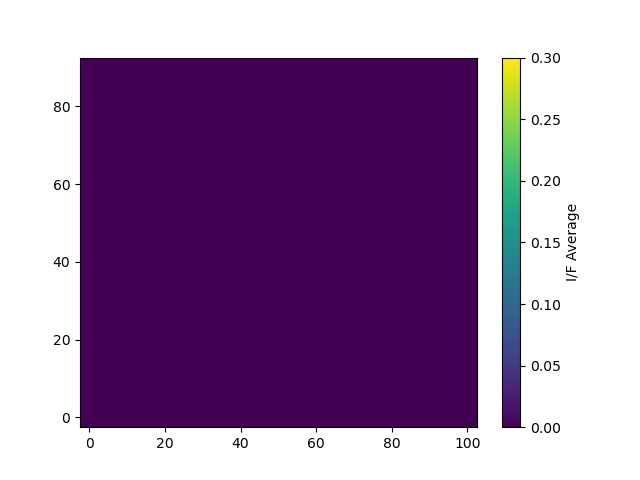

In [49]:
# CELL 2: Display single model, cycling through it in an animation.
%matplotlib ipympl
# Set the model by setting this line here to the one you want to look at:

animMatrix = loadedModels[2]
#insert the number of the model you wish to display.

cmap = 'viridis'
#if you want to change the color map

vmin=0
#Recommended to set this to 0 and never touch it. 

vmax=0.3 #Maximum displayed value.
#Raise if you're saturating, lower if you can't see any detail.

X = 21 #incidence
Y = 19 #Emission
Z = 37 #Azimuth

fig, ax = plt.subplots() #matplotlib's axis and figure notation is so annoying and obtuse...

#Now we'd like to try to animate it. 
#https://matplotlib.org/stable/users/explain/animations/animations.html
#Eventually had to use ChatGPT to help here. Could not get the ArtistAnimator to work, but it could
#get the FuncAnimation to work--evidentially defining zz inside the funciton/loop was important.
#Even though I thought I already tried that...

#Now we actually need to get the slices
#Set up x and y divisions.        
xx = np.linspace(0, 100, 21)
yy = np.linspace(0, 90, 19)

c = ax.pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap,vmin=vmin,vmax=vmax)
fig.colorbar(c, ax=ax, label='I/F Average')
# annoyance of animation: trying to update the color bar duplicates it.
# so we need a "dummy" plot to initialize it before we start animating. 

#Making an array so the title can display the azimuth angle. 
angles = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045", "050", "055", "060", "065", "070", "075",
             "080", "085", "090", "095", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155",
             "160", "165", "170", "175", "180"] 

def update(frame):
    ax.clear()
    zz = np.zeros((Y, X))
    for x in range(X):
        for y in range(Y):
            zz[y][x] = animMatrix[x][y][frame]
    azimuth = ax.pcolor(xx, yy, zz, cmap=cmap,vmin=vmin,vmax=vmax)
    ax.set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = 'Observation Angle Model. Azimuth: '+str(angles[frame])+ ' degrees')
    

ani = animation.FuncAnimation(fig, update, frames=Z, interval=500)

# To save the animation using Pillow as a gif. Use FFMpegFileWriter for mp4. 
#writer = animation.FFMpegFileWriter(fps = 2)
#ani.save('TEST2.mp4', writer = writer)
#writer = animation.PillowWriter(fps=5)
#ani.save('TEST2.gif', writer=writer)

plt.show()

In [50]:
# CELL 3: Stop the animation. Always do this before re-running cell 2.

ani.pause()
plt.close()

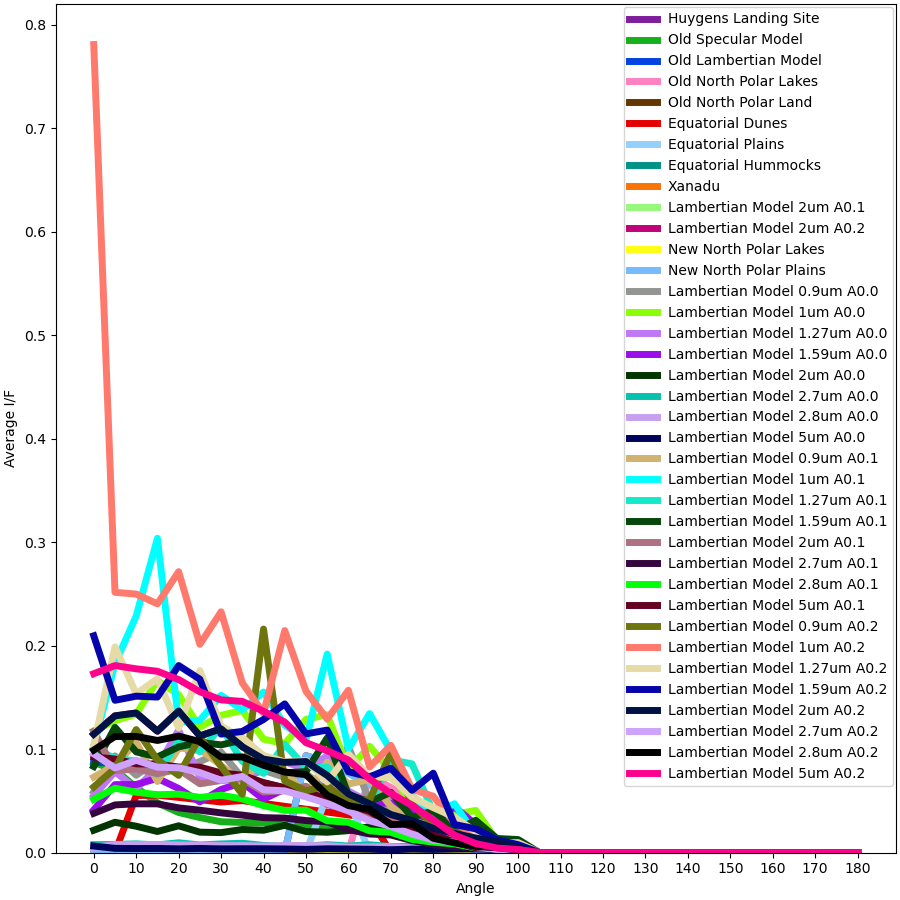

In [53]:
#CELL 4: OMNI DISPLAY: DISPLAYS ALL DATA AT ONCE ADJUSTABLE WITH SLIDERS.
#NOTE: currently, displaying more things has to be hardcoded in. Yes, it sucks. 
#There has to be a way to genrealize it.
%matplotlib ipympl 
#Allows animation and interaction.

plt.close()

angleSpace = np.linspace(0, 180, 37)
inciSpace = np.linspace(0, 100, 21)
emisSpace = np.linspace(0, 90, 19)
azimSpace = np.linspace(0, 180, 37)
typeSpace = {("inci", "emis", "azim")}

class ControlPlottingManager:
    models = len(loadedModels) #To keep the compiler from complaining about an empty class.
    #This class exists soley so I can store dynamically created functions in it.
    #I blame mpl_interactions.ipyplot for this, every funciton it plots has to be separately defined. 

i = 0
while (i < len(loadedModels)): #This loop here dynamically constructs a unique function for every line we want to plot.
    exec(
'''def controllablePlotter1(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    model = 1
    mod = 1 #Or 8???

    i = 0
    if (types == "inci"):
        while (i < 21):
            theLine.append(loadedModels[''' + str(i) + '''][i][emis][azim]*mod)
            i=i+1
    if (types == "emis"):
        while (i < 19):
            theLine.append(loadedModels[''' + str(i) + '''][inci][i][azim]*mod)
            i=i+1
    if (types == "azim"):
        while (i < 37):
            theLine.append(loadedModels[''' + str(i) + '''][inci][emis][i]*mod)
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine'''
    )
    setattr(ControlPlottingManager, 'modelFunc' + str(i), controllablePlotter1)
    i=i+1

angleLabels = [0, 10, 20, 30, 40, 50, 60, 70,
             80, 90, 100, 110, 120, 130, 140, 150,
             160, 170, 180] 

ticker = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]

#colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", 
         #"tab:olive", "tab:cyan", "k", "peru", "darkgreen", "skyblue", "navy", "blueviolet", "magenta", "palegreen", 
          #"teal", "purple"]

#So it turns out we did need a lot of colors eventually. 
colors = ["xkcd:purple", "xkcd:green", "xkcd:blue", "xkcd:pink", "xkcd:brown", "xkcd:red",
         "xkcd:light blue", "xkcd:teal", "xkcd:orange", "xkcd:light green", "xkcd:magenta", "xkcd:yellow",
         "xkcd:sky blue", "xkcd:grey", "xkcd:lime green", "xkcd:light purple", "xkcd:violet", "xkcd:dark green",
         "xkcd:turquoise", "xkcd:lavender", "xkcd:dark blue", "xkcd:tan", "xkcd:cyan", "xkcd:aqua",
         "xkcd:forest green", "xkcd:mauve", "xkcd:dark purple", "xkcd:bright green", "xkcd:maroon", "xkcd:olive",
         "xkcd:salmon", "xkcd:beige", "xkcd:royal blue", "xkcd:navy blue", "xkcd:lilac", "xkcd:black", 
         "xkcd:hot pink", "xkcd:light brown", "xkcd:pale green", "xkcd:peach", "xkcd:olive green", "xkcd:dark pink",
         "xkcd:periwinkle", "xkcd:sea green", "xkcd:lime", "xkcd:indigo", "xkcd:mustard", "xkcd:light pink"]

#Sometimes the default color palette will start duplicating, we need to be able to differentiate. 
#Hence, a lot more colors. 

import mpl_interactions.ipyplot as iplt
fig, ax = plt.subplots(figsize = (9,9), layout="constrained") #matplotlib's axis and figure notation is so annoying and obtuse...

controls = iplt.plot(getattr(ControlPlottingManager, "modelFunc0"), inci=inciSpace, emis=emisSpace, azim=azimSpace, types=typeSpace, 
                     ax = ax, label=modelNames[0][1], color = colors[0], linewidth = 5)

i = 1
while (i < len(loadedModels)):
    iplt.plot(getattr(ControlPlottingManager, "modelFunc" + str(i)), controls=controls, ax = ax, label=modelNames[i][1], color = colors[i], linewidth = 5)
    i=i+1

#iplt.plot(ControlPlottingManager.modelFunc2, controls=controls, ax = ax, label="Old Lambertian Model")
#iplt.plot(LkD, controls=controls, ax = ax, label="North Pole Lake Data")
#iplt.plot(LnD, controls=controls, ax = ax, label="North Pole Land Data")
#iplt.plot(eDunes, controls=controls, ax = ax, label="Equatorial Dunes Data")
#iplt.plot(ePlains, controls=controls, ax = ax, label="Equatorial Plains Data")
#iplt.plot(eHumm, controls=controls, ax = ax, label="Equatorial Hummocky Data")
#iplt.plot(eXana, controls=controls, ax = ax, label="Equatorial Xanadu Data")
#iplt.plot(SpecialD2, controls=controls, ax = ax, label="New 2um Specular Model (Haze 2)")
#iplt.plot(SpecialD, controls=controls, ax = ax, label="Huygens Landing Site Data")
#iplt.plot(HMR, controls=controls, ax = ax, label="Huygens Landing Site Data (Reduced)")
#iplt.plot(HMR2, controls=controls, ax = ax, label="Huygens Landing Site Data (Reduced2)")
#iplt.plot(L0, controls=controls, ax = ax, label="Lambertian Model 0.0 A")
#iplt.plot(L1, controls=controls, ax = ax, label="Lambertian Model 0.1 A")
#iplt.plot(L2, controls=controls, ax = ax, label="Lambertian Model 0.2 A")
ax.set(ylim = 0.0, xlabel = "Angle", ylabel = "Average I/F", xticks = ticker, xticklabels = angleLabels)
fig.legend()
#plt.savefig("TitanColorSchemes.tif", format="tif", bbox_inches='tight')

plt.show()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

VBox()

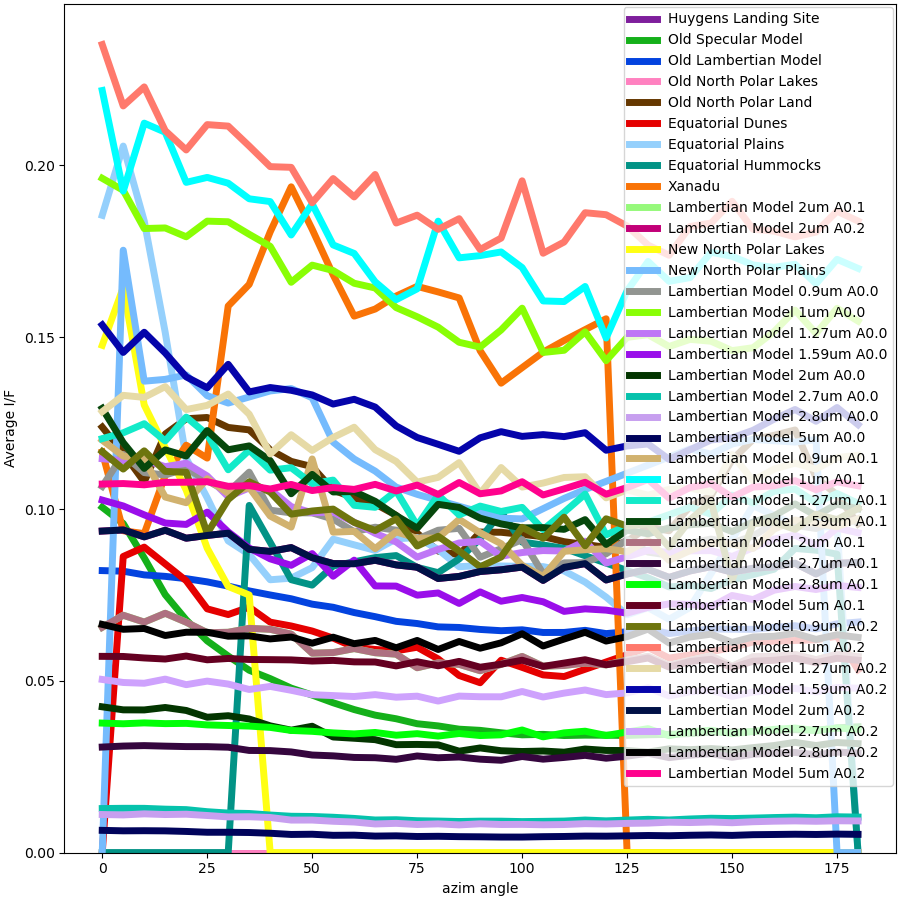

In [52]:
#CELL 5: Printing a single image rather than having to move the sliders. Generally used for printing out the images at the end.

plt.close()
# Getting a Sliced Line through the thing...
sline = "azim" # "inci" "emis" "azim" choose which variable to slice through.
inci = 10 #incidence, 13=65 degrees. This is the index that increments every 5 degrees.
emis = 9 #emission, 12=60 degrees. This is the index that increments every 5 degrees.
azim = 18 #azimuth, 36=180 degrees. This is the index that increments every 5 degrees.

#The variable being sliced through will not be used. 
Eangles = []
allModels = []
for model in modelNames:
    allModels.append([])

#Load in 
i = 0
if (sline == "inci"):
    while (i < 21):
        j = 0
        while (j < len(modelNames)):
            allModels[j].append(loadedModels[j][i][emis][azim])
            j=j+1
        Eangles.append(i*5.)
        i=i+1
if (sline == "emis"):
    while (i < 19):
        j = 0
        while (j < len(modelNames)):
            allModels[j].append(loadedModels[j][inci][i][azim])
            j=j+1
        Eangles.append(i*5.)
        i=i+1
if (sline == "azim"):
    while (i < 37):
        j = 0
        while (j < len(modelNames)):
            allModels[j].append(loadedModels[j][inci][emis][i])
            j=j+1
        Eangles.append(i*5.)
        i=i+1

fig, ax = plt.subplots(figsize = (9,9), layout="constrained") #matplotlib's axis and figure notation is so annoying and obtuse...

i = 0
while (i < len(modelNames)):
    iplt.plot(Eangles, np.array(allModels[i]), label=modelNames[i][1], color=colors[i], linewidth = 5)
    i=i+1

ax.set(xlabel = sline + " angle")
ax.set(ylabel = "Average I/F")
fig.legend()

ax.set(ylim = 0.0)

plt.show()

In [20]:
#Cell 6: Save the plot you just generated.

#Remember to set the name you want to save it as here:
plt.savefig("Models2umLambAlbedos.Inci50.Emis45.AzimSlice.pdf", format="pdf")
#"Models2umLambAlbedos.Inci50.Emis45.Azim90.pdf"

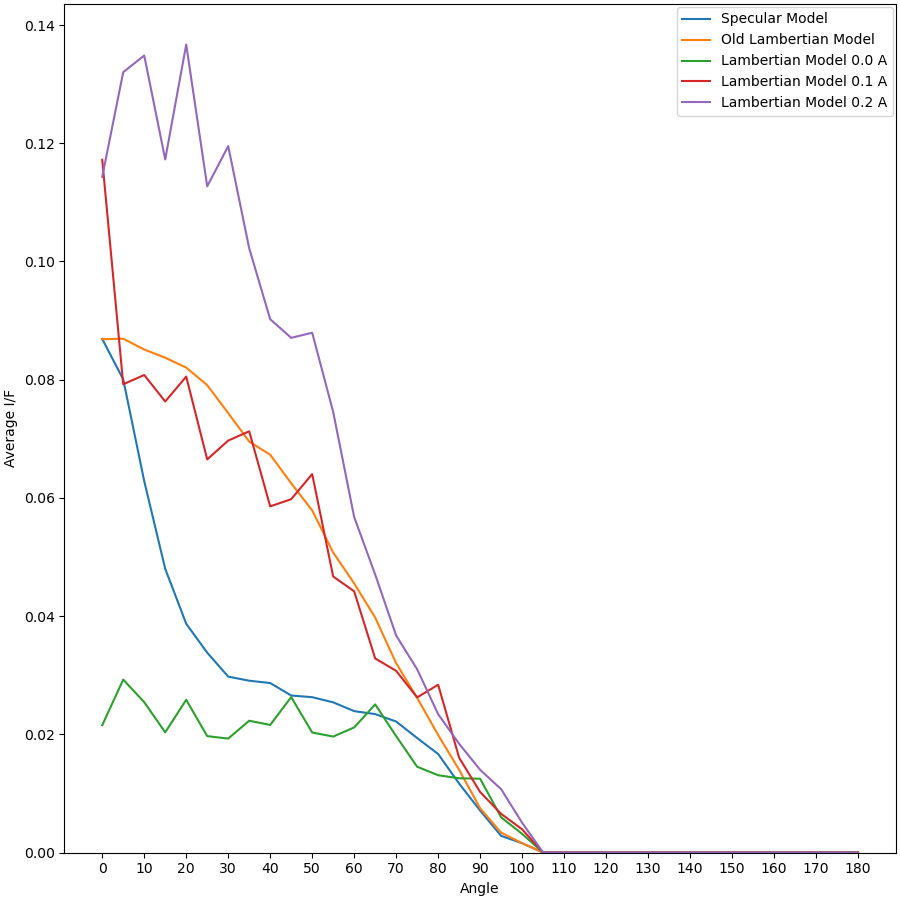

In [12]:
#OLD LEGACY CODE IN CASE THE ABOVE BREAKS SINCE WHILE THIS IS A PAIN IT IS SIMPLE AND EASY TO UNDERSTAND.
#NOTE: currently, displaying more things has to be hardcoded in. Yes, it sucks. 
#There has to be a way to genrealize it.
%matplotlib ipympl 
#Allows animation and interaction.

plt.close()
import mpl_interactions.ipyplot as iplt
fig, ax = plt.subplots(figsize = (9,9), layout="constrained") #matplotlib's axis and figure notation is so annoying and obtuse...

angleSpace = np.linspace(0, 180, 37)
inciSpace = np.linspace(0, 100, 21)
emisSpace = np.linspace(0, 90, 19)
azimSpace = np.linspace(0, 180, 37)
typeSpace = np.linspace(1,3,3)

def SM(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(specSim[i][emis][azim]*8)
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(specSim[inci][i][azim]*8)
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(specSim[inci][emis][i]*8)
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine
def LM(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(lambSim[i][emis][azim]*8)
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(lambSim[inci][i][azim]*8)
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(lambSim[inci][emis][i]*8)
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine
def LkD(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixLake[i][emis][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixLake[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixLake[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine
def LnD(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixLand[i][emis][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixLand[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixLand[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def SpecialD(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixHuygens[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixHuygens[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixHuygens[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def eDunes(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixDunes[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixDunes[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixDunes[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def ePlains(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixPlains[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixPlains[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixPlains[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def eHumm(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixHumm[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixHumm[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixHumm[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def eXana(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixXanadu[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixXanadu[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixXanadu[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1

    return theLine

def L0(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(lambSim0[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(lambSim0[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(lambSim0[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1

    return theLine

def L1(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(lambSim1[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(lambSim1[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(lambSim1[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1

    return theLine

def L2(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(lambSim2[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(lambSim2[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(lambSim2[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1

    return theLine


angleLabels = [0, 10, 20, 30, 40, 50, 60, 70,
             80, 90, 100, 110, 120, 130, 140, 150,
             160, 170, 180] 

ticker = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]

controls = iplt.plot(SM, inci=inciSpace, emis=emisSpace, azim=azimSpace, types=typeSpace, ax = ax, label="Specular Model")
iplt.plot(LM, controls=controls, ax = ax, label="Old Lambertian Model")
#iplt.plot(LkD, controls=controls, ax = ax, label="North Pole Lake Data")
#iplt.plot(LnD, controls=controls, ax = ax, label="North Pole Land Data")
#iplt.plot(eDunes, controls=controls, ax = ax, label="Equatorial Dunes Data")
#iplt.plot(ePlains, controls=controls, ax = ax, label="Equatorial Plains Data")
#iplt.plot(eHumm, controls=controls, ax = ax, label="Equatorial Hummocky Data")
#iplt.plot(eXana, controls=controls, ax = ax, label="Equatorial Xanadu Data")
#iplt.plot(SpecialD2, controls=controls, ax = ax, label="New 2um Specular Model (Haze 2)")
#iplt.plot(SpecialD, controls=controls, ax = ax, label="Huygens Landing Site Data")
#iplt.plot(HMR, controls=controls, ax = ax, label="Huygens Landing Site Data (Reduced)")
#iplt.plot(HMR2, controls=controls, ax = ax, label="Huygens Landing Site Data (Reduced2)")
iplt.plot(L0, controls=controls, ax = ax, label="Lambertian Model 0.0 A")
iplt.plot(L1, controls=controls, ax = ax, label="Lambertian Model 0.1 A")
iplt.plot(L2, controls=controls, ax = ax, label="Lambertian Model 0.2 A")
ax.set(ylim = 0.0,xlabel = "Angle", ylabel = "Average I/F", xticks = ticker, xticklabels = angleLabels)
fig.legend()
#plt.savefig("TitanColorSchemes.tif", format="tif", bbox_inches='tight')

plt.show()